# TRAINING VIS.

## Baseline

### Normalized data

ordenar por fechga

ver lkas ultimas 2 de cada modelo; realizar un mínimo análisis, por ej. relativo al overfitting;




In [13]:
import json
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict

# Path to runs_index.json
index_path = Path("../logs/training/baseline/testing_purposes/runs_index.json")

# Load runs_index.json
with open(index_path) as f:
    runs_index = json.load(f)

# Sort by timestamp
runs_index.sort(key=lambda x: x["timestamp"])

# Base directory for JSON files
base_dir = index_path.parent

# Group runs by model_name
models = defaultdict(list)
for run in runs_index:
    run_path = base_dir / run["json_file"]
    with open(run_path) as f:
        run_data = json.load(f)
    models[run_data["model_name"]].append(run_data)


# goal of the previous part -> order by date!!!!!

In [24]:
models['baseline'][0]['history']

{'loss': [49.904815673828125, 21.372377395629883],
 'val_loss': [27.674236297607422, 11.186029434204102],
 'accuracy': [0.6180904507637024, 0.43718594312667847],
 'val_accuracy': [0.6140350699424744, 0.19298245012760162]}

In [32]:
import pandas as pd
from IPython.display import display

data = {
    'model_name': 'baseline',
    'data_variant': 'testing_purposes',
    'timestamp': '20250814_150158',
    'test_loss': 11.006034851074219,
    'test_accuracy': 0.2017543911933899,
    'hyperparameters': {
        'batch_size': 64,
        'optimizer': 'adam',
        'learning_rate': 0.001,
        'epochs': 2
    }
}

# Separate basic info and hyperparameters
basic_info_keys = ['model_name', 'data_variant', 'timestamp', 'test_loss', 'test_accuracy']
basic_info = {k: data[k] for k in basic_info_keys}
hyperparams = data['hyperparameters']

# Convert to DataFrames
df_basic = pd.DataFrame([basic_info])
df_hyper = pd.DataFrame([hyperparams])

# Display nicely in notebook
print("=== Basic Info ===")
display(df_basic)

#print("=== Hyperparameters ===")
#display(df_hyper)

# Convert to vertical table
df_hyper_vertical = pd.DataFrame(list(hyperparams.items()), columns=['Parameter', 'Value'])

print("=== Hyperparameters (Vertical) ===")
display(df_hyper_vertical)

=== Basic Info ===


,model_name,data_variant,timestamp,test_loss,test_accuracy
0,baseline,testing_purposes,20250814_150158,11.006035,0.201754


=== Hyperparameters (Vertical) ===


,Parameter,Value
0,batch_size,64
1,optimizer,adam
2,learning_rate,0.001
3,epochs,2


In [28]:
models['baseline'][0]

{'model_name': 'baseline',
 'data_variant': 'testing_purposes',
 'timestamp': '20250814_150158',
 'test_loss': 11.006034851074219,
 'test_accuracy': 0.2017543911933899,
 'hyperparameters': {'batch_size': 64,
  'optimizer': 'adam',
  'learning_rate': 0.0010000000474974513,
  'epochs': 2},
 'history': {'loss': [49.904815673828125, 21.372377395629883],
  'val_loss': [27.674236297607422, 11.186029434204102],
  'accuracy': [0.6180904507637024, 0.43718594312667847],
  'val_accuracy': [0.6140350699424744, 0.19298245012760162]}}

{'loss': [49.904815673828125, 21.372377395629883], 'val_loss': [27.674236297607422, 11.186029434204102], 'accuracy': [0.6180904507637024, 0.43718594312667847], 'val_accuracy': [0.6140350699424744, 0.19298245012760162]}


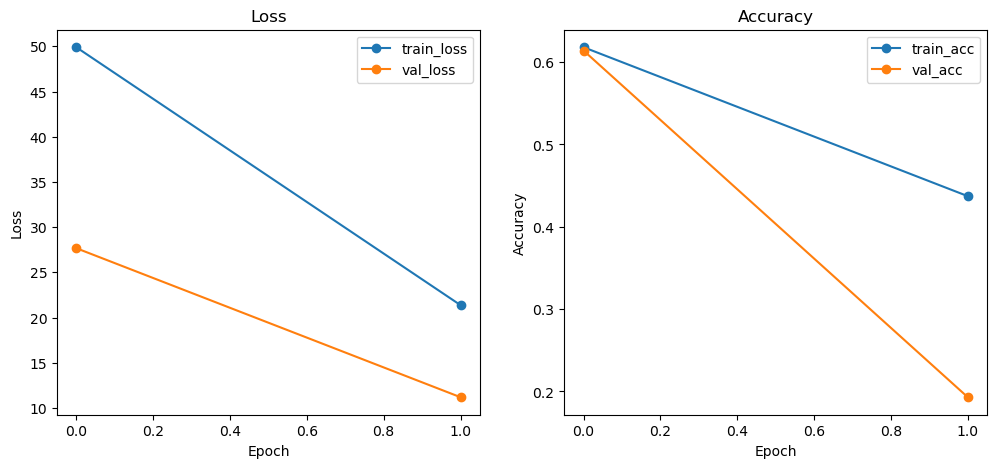

In [27]:
# with loss and acc
def plot_history(history):
    # Plot
    plt.figure(figsize=(12, 5))
    
    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='train_loss', marker='o')
    plt.plot(history['val_loss'], label='val_loss', marker='o')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='train_acc', marker='o')
    plt.plot(history['val_accuracy'], label='val_acc', marker='o')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()
        

history = models['baseline'][0]['history']
print(history)
plot_history(history)

In [ ]:
#/home/marcos/Escritorio/AI-prod/ML-Prod-Example